<a href="https://colab.research.google.com/github/ankitbatra22/Gesture-Recognizer/blob/develop/gesture_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from preprocessing import VideoFolder
import json
from torchvision.transforms import *
import cv2
from PIL import Image as im
from matplotlib import pyplot as plt
import torch.optim as optim
import os
import tqdm
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/20bn-jester-v1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: 20bn-jester-v1/60356/00010.jpg  
  inflating: 20bn-jester-v1/60356/00011.jpg  
  inflating: 20bn-jester-v1/60356/00005.jpg  
  inflating: 20bn-jester-v1/60356/00013.jpg  
  inflating: 20bn-jester-v1/60356/00007.jpg  
  inflating: 20bn-jester-v1/60356/00006.jpg  
  inflating: 20bn-jester-v1/60356/00012.jpg  
  inflating: 20bn-jester-v1/60356/00016.jpg  
  inflating: 20bn-jester-v1/60356/00002.jpg  
  inflating: 20bn-jester-v1/60356/00003.jpg  
  inflating: 20bn-jester-v1/60356/00017.jpg  
  inflating: 20bn-jester-v1/60356/00029.jpg  
  inflating: 20bn-jester-v1/60356/00001.jpg  
  inflating: 20bn-jester-v1/60356/00015.jpg  
  inflating: 20bn-jester-v1/60356/00014.jpg  
  inflating: 20bn-jester-v1/60356/00028.jpg  
  inflating: 20bn-jester-v1/388/00025.jpg  
  inflating: 20bn-jester-v1/388/00031.jpg  
  inflating: 20bn-jester-v1/388/00019.jpg  
  inflating: 20bn-jester-v1/388/00018.jpg  
  inflating: 20bn-jester-v1/388/00030

In [ ]:
import json
import os

with open("./configs/config.json") as dataFile:
  config = json.load(dataFile)

save_dir = os.path.join(config["output_dir"], config["model_name"])

transform = Compose([
        CenterCrop(100),
        #Resize(size=(300,300)),
        ToTensor()
        #Normalize(mean=[0.485, 0.456, 0.406],
                  #std=[0.229, 0.224, 0.225])
    ])

In [ ]:
train_data = VideoFolder(root=config['train_data_folder'],
                             csv_file_input=config['train_data_csv'],
                             csv_file_labels=config['labels_csv'],
                             clip_size=config['clip_size'],
                             nclips=1,
                             step_size=config['step_size'],
                             is_val=False,
                             transform=transform,
                             )

train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=config['batch_size'], shuffle=True,
        num_workers=config['num_workers'], pin_memory=True,
        drop_last=True)
  
val_data = VideoFolder(root=config['val_data_folder'],
                          csv_file_input=config['val_data_csv'],
                          csv_file_labels=config['labels_csv'],
                          clip_size=config['clip_size'],
                          nclips=1,
                          step_size=config['step_size'],
                          is_val=True,
                          transform=transform,
                          )

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=config['batch_size'], shuffle=False,
    num_workers=config['num_workers'], pin_memory=True,
    drop_last=False)

In [ ]:
from model import Net

device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

net = Net()
print(net)
optimizer = torch.optim.SGD(net.parameters(), config['lr'],
                                momentum=config['momentum'],
                                weight_decay=config['weight_decay'])

criterion = nn.CrossEntropyLoss(reduction='sum')
EPOCHS = 10

Tesla P100-PCIE-16GB
True
Net(
  (conv1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=Fals

torch.Size([32, 3, 18, 100, 100])
tensor(3)


IndexError: ignored

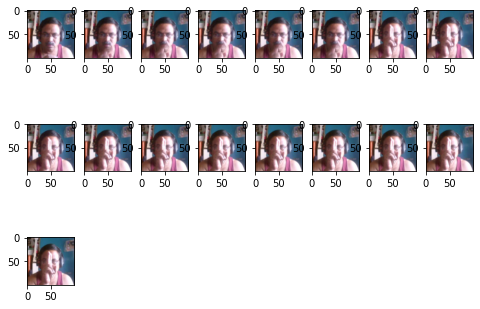

In [ ]:
x = next(iter(val_loader))
print(x[0].shape)

NUM = 15

print(x[1][NUM])
vidBatch = (x[0][NUM])
pog = vidBatch.permute(1,2,3,0)
pog[0]

import numpy as np
import matplotlib.pyplot as plt

w = 12
h = 12
fig = plt.figure(figsize=(8, 8))
columns = 8
rows = 4

for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    img = pog[i].detach().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()



  0%|          | 0/3278 [00:00<?, ?it/s]

EPOCH:  0


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  20.216881608366602 VALIDATION LOSS: 12.36385918682941
VALIDATION ACCURACY 0.38175475059382424
EPOCH:  1


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  11.628125805050917 VALIDATION LOSS: 9.121334230885653
VALIDATION ACCURACY 0.40090558194774345
EPOCH:  2


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  8.58580658418002 VALIDATION LOSS: 10.682105523036382
VALIDATION ACCURACY 0.40459224069675376
EPOCH:  3


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  7.075864066540015 VALIDATION LOSS: 9.781056119752893
VALIDATION ACCURACY 0.410666567695962
EPOCH:  4


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  6.175516888451742 VALIDATION LOSS: 10.958374928975049
VALIDATION ACCURACY 0.413895486935867
EPOCH:  5


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  6.303463935267062 VALIDATION LOSS: 11.89981998044847
VALIDATION ACCURACY 0.41473673792557403
EPOCH:  6


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  8.19134585071815 VALIDATION LOSS: 17.58326047142158
VALIDATION ACCURACY 0.4114989820156091
EPOCH:  7


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  11.443325502108703 VALIDATION LOSS: 16.757673537586495
VALIDATION ACCURACY 0.4101748070071259
EPOCH:  8


  0%|          | 0/3278 [00:00<?, ?it/s]

TRAIN LOSS:  12.558177166578423 VALIDATION LOSS: 25.709129100712357
VALIDATION ACCURACY 0.4090211797307997
EPOCH:  9


100%|██████████| 3278/3278 [20:43<00:00,  2.64it/s]


TRAIN LOSS:  21.583340267834135 VALIDATION LOSS: 25.02807064237617
VALIDATION ACCURACY 0.39815914489311166


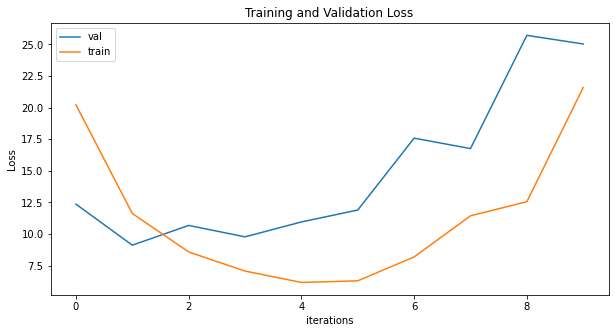

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

net.cuda()
torch.cuda.empty_cache()

val_losses = []
train_losses = []
min_valid_loss = 1e99
correct, total = 0, 0


for epoch in range(EPOCHS):
    train_loss = 0.0
    net.train()

    print("EPOCH: ", epoch)
    for i, (input, target) in enumerate(tqdm(train_loader)):
      #print(i)
      input, target = input.to(device = device), target.to(device = device)
      net.zero_grad()
      output = net(input)
      loss = criterion(output, target)
      train_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #print("LOSS", loss / 32)

    net.eval()
    validation_loss = 0.0


    with torch.no_grad():
      for i, (item, truth) in enumerate(val_loader):
        item, truth = item.to(device = device), truth.to(device = device)
        out = net(item)
        #print(torch.argmax(out, dim=1), truth)
        # [predictions] and [truth]
        matching = torch.eq(torch.argmax(out, dim=1), truth)
        #print(torch.sum(matching, dim=0).item())
        # [boolean array]
        correct += torch.sum(matching, dim=0).item()
        total += 32
        valLoss = criterion(out, truth)
        validation_loss += valLoss.item()

    #print(correct, total)
    accuracy = correct / total
        

    validation_loss /= len(val_loader)
    train_loss /= len(train_loader)
    
    if validation_loss < min_valid_loss:
      min_valid_loss = validation_loss
      torch.save(net.state_dict(), '/content/drive/MyDrive/weights.pt')
      
    train_losses.append(train_loss)
    val_losses.append(validation_loss)

    print()
    print("TRAIN LOSS: ", train_loss, "VALIDATION LOSS:", validation_loss, )
    print("VALIDATION ACCURACY", accuracy)



plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

net.cuda()
torch.cuda.empty_cache()

val_losses = []
train_losses = []
min_valid_loss = 1e99
correct, total = 0, 0


for epoch in range(EPOCHS):
    train_loss = 0.0
    net.train()

    print("EPOCH: ", epoch)
    for i, (input, target) in enumerate(tqdm(train_loader)):
      #print(i)
      input, target = input.to(device = device), target.to(device = device)
      net.zero_grad()
      output = net(input)
      loss = criterion(output, target)
      train_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #print("LOSS", loss / 32)

    net.eval()
    validation_loss = 0.0


    with torch.no_grad():
      for i, (item, truth) in enumerate(val_loader):
        item, truth = item.to(device = device), truth.to(device = device)
        out = net(item)
        #print(torch.argmax(out, dim=1), truth)
        # [predictions] and [truth]
        matching = torch.eq(torch.argmax(out, dim=1), truth)
        #print(torch.sum(matching, dim=0).item())
        # [boolean array]
        correct += torch.sum(matching, dim=0).item()
        total += 32
        valLoss = criterion(out, truth)
        validation_loss += valLoss.item()
        for item in 
    #print(correct, total)
    accuracy = correct / total
        

    validation_loss /= len(val_loader)
    train_loss /= len(train_loader)
    
    if validation_loss < min_valid_loss:
      min_valid_loss = validation_loss
      torch.save(net.state_dict(), '/content/drive/MyDrive/weights.pt')
      
    train_losses.append(train_loss)
    val_losses.append(validation_loss)

    print()
    print("TRAIN LOSS: ", train_loss, "VALIDATION LOSS:", validation_loss, )
    print("VALIDATION ACCURACY", accuracy)



plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



  0%|          | 0/3278 [00:00<?, ?it/s]

EPOCH:  0


  0%|          | 0/3278 [00:00<?, ?it/s]


TRAIN LOSS:  31.87703920372414 VALIDATION LOSS: 54.727879449477385
VALIDATION ACCURACY 0.1089667458432304
EPOCH:  1


  7%|▋         | 230/3278 [01:27<19:13,  2.64it/s]

In [ ]:
torch.save(net.state_dict(), '/content/drive/MyDrive/10epochs.pt')